In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image

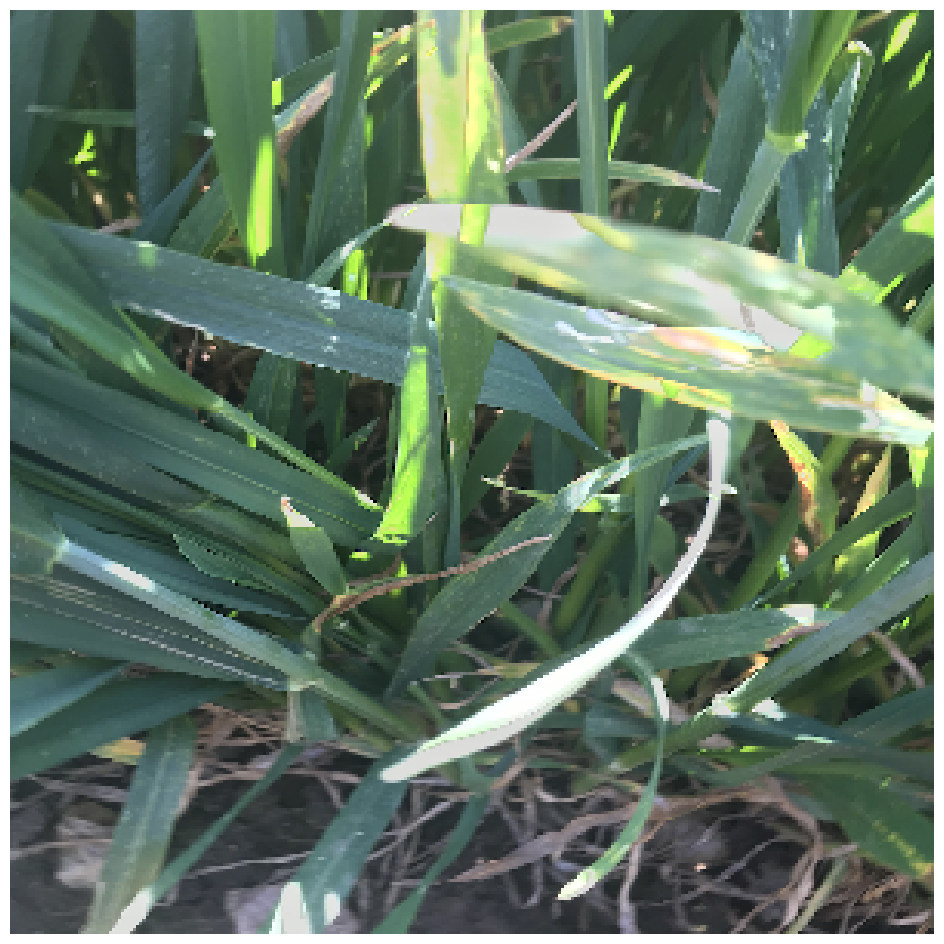

In [4]:
test_image =image.load_img(r"E:\Dataset\wheat disease\data\test\septoria_test\septoria_14.png", target_size = (300, 300))

test_image = image.img_to_array(test_image)
plt.figure(figsize=(12, 12))
plt.imshow(test_image.astype(np.uint8))
plt.axis("off")
plt.show()

In [5]:
def train_dg(path):

    train = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    rescale=1./255,
    )

    train = train.flow_from_directory(
    directory=path,
    batch_size=32,
    target_size=(224, 224),
    class_mode="categorical"
    )
    return train

In [6]:
def val_dg(path):

    test = ImageDataGenerator(
        rescale=1./255
    )

    test = test.flow_from_directory(
    directory=path,
    batch_size=32,
    target_size=(224, 224),
    class_mode="categorical"
    )
    return test

In [7]:
train_datagen = train_dg(r"E:\Dataset\wheat disease\data\train")

Found 13104 images belonging to 15 classes.


In [8]:
test_datagen = val_dg(r"E:\Dataset\wheat disease\data\valid")

Found 300 images belonging to 15 classes.


In [9]:
ig, la = next(train_datagen)

(-0.5, 223.5, 223.5, -0.5)

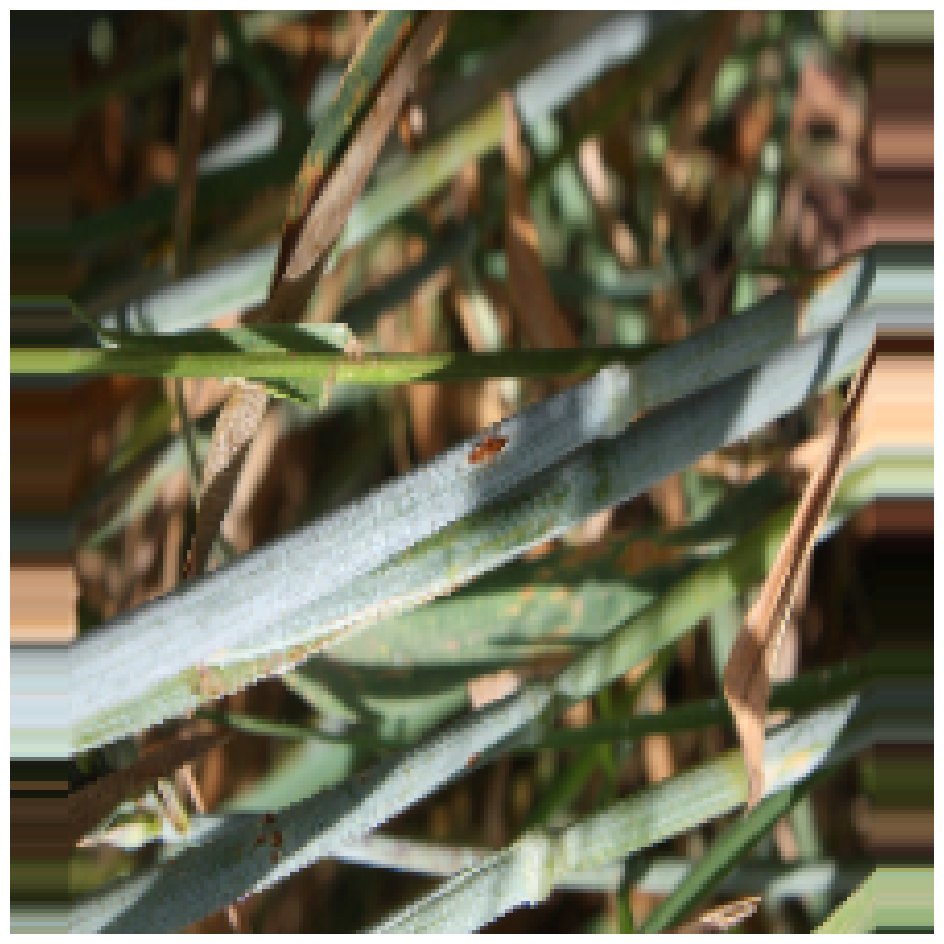

In [10]:
plt.figure(figsize=(12, 12))
plt.imshow(ig[0])
plt.axis("off")

In [9]:
def model():

    cnn = tf.keras.models.Sequential()

    #First block
    cnn.add(tf.keras.layers.Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu",
    input_shape = (224, 224, 3)
    ))

    cnn.add(tf.keras.layers.Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu"
    ))

    cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=2
    ))

    #Second block
    cnn.add(tf.keras.layers.Conv2D(
    filters = 128,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu"
    ))

    cnn.add(tf.keras.layers.Conv2D(
    filters = 128,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu"
    ))

    cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=2
    ))

    #Third block
    cnn.add(tf.keras.layers.Conv2D(
    filters = 256,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu"
    ))

    cnn.add(tf.keras.layers.Conv2D(
    filters = 256,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu"
    ))
    
    cnn.add(tf.keras.layers.Conv2D(
    filters = 256,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu"
    ))

    cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=2
    ))

    #Fourth block
    cnn.add(tf.keras.layers.Conv2D(
    filters = 512,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu"
    ))

    cnn.add(tf.keras.layers.Conv2D(
    filters = 512,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu"
    ))
    
    cnn.add(tf.keras.layers.Conv2D(
    filters = 512,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu"
    ))

    cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=2
    ))

    #Fifth block
    cnn.add(tf.keras.layers.Conv2D(
    filters = 512,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu"
    ))

    cnn.add(tf.keras.layers.Conv2D(
    filters = 512,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu"
    ))
    
    cnn.add(tf.keras.layers.Conv2D(
    filters = 512,
    kernel_size = (3, 3),
    strides=(1, 1),
    activation="relu"
    ))

    cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=2
    ))

    cnn.add(tf.keras.layers.Flatten())

    cnn.add(tf.keras.layers.Dense(
        units=4096, 
        activation="relu"
    ))

    cnn.add(tf.keras.layers.Dropout(rate=0.5))

    cnn.add(tf.keras.layers.Dense(
        units=4096, 
        activation="relu"
    ))

    cnn.add(tf.keras.layers.Dropout(rate=0.5))

    cnn.add(tf.keras.layers.Dense(
        units=15,
        activation="softmax"
    ))

    return cnn

In [10]:
VGC16 = model()
VGC16.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 128)       0         
 g2D)                                                 

In [11]:
 VGC16.compile(
        loss = "categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )

In [12]:
call = tf.keras.callbacks.EarlyStopping(
    patience=3, 
    monitor="accuracy"
)

In [13]:
VGC16.fit(
    x=train_datagen,
    batch_size=32,
    epochs=15,
    callbacks=call,
    validation_data=test_datagen
)

Epoch 1/15


  1/819 [..............................] - ETA: 4:26:09 - loss: 2.7083 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [14]:
def model_1_entryflow():

    cnn = tf.keras.models.Sequential()

    cnn.add(tf.keras.layers.Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    strides=(2, 2),
    activation="relu",
    input_shape=(299, 299, 3)
    ))

    # cnn.add(tf.keras.layers.Add(tf.keras.layers.ReLU()))   

    cnn.add(tf.keras.layers.Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    activation="relu"
    ))    

    # cnn.add(tf.keras.layers.Add(tf.keras.layers.ReLU()))   

    cnn.add(tf.keras.layers.SeparableConv2D(
    filters = 128,
    kernel_size = (3,3),
    activation="relu",
    ))

    # cnn.add(tf.keras.layers.Add(tf.keras.layers.ReLU()))

    cnn.add(tf.keras.layers.SeparableConv2D(
    filters = 128,
    kernel_size = (3,3),
    activation="relu",
    ))

    cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=(3, 3),
    strides=(2, 2)
    ))

    # cnn.add(tf.keras.layers.Add(tf.keras.layers.ReLU()))

    cnn.add(tf.keras.layers.SeparableConv2D(
    filters = 256,
    kernel_size = (3,3),
    activation="relu",
    ))

    # cnn.add(tf.keras.layers.Add(tf.keras.layers.ReLU()))

    cnn.add(tf.keras.layers.SeparableConv2D(
    filters = 256,
    kernel_size = (3,3),
    activation="relu",
    ))

    cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=(3, 3),
    strides=(2, 2)
    ))

    # cnn.add(tf.keras.layers.Add(tf.keras.layers.ReLU()))

    cnn.add(tf.keras.layers.SeparableConv2D(
    filters = 728,
    kernel_size = (3,3),
    activation="relu",
    ))

    # cnn.add(tf.keras.layers.Add(tf.keras.layers.ReLU()))

    cnn.add(tf.keras.layers.SeparableConv2D(
    filters = 728,
    kernel_size = (3,3),
    activation="relu",
    ))

    cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=(3, 3),
    strides=(2, 2)
    ))

    return cnn

In [15]:
re = model_1_entryflow()

In [16]:
re.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 149, 149, 32)      896       
                                                                 
 conv2d_2 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 separable_conv2d (Separabl  (None, 145, 145, 128)     8896      
 eConv2D)                                                        
                                                                 
 separable_conv2d_1 (Separa  (None, 143, 143, 128)     17664     
 bleConv2D)                                                      
                                                                 
 max_pooling2d (MaxPooling2  (None, 71, 71, 128)       0         
 D)                                                              
                                                      